# Weather Exploration Project - Udacity
## Diego Merino Muñoz

In [27]:
# Importing needed libraries for the exploration and Setting the matplotlib figure size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rcParams["figure.figsize"] = (16,5)



In [11]:
# Loading the CSVs as Pandas dataframes, with the year as index and the dates parsed

city_data = pd.read_csv('citywide-results.csv', index_col='year', parse_dates=True)
global_data = pd.read_csv('global-data.csv', index_col = 'year', parse_dates= True)

In [18]:
# Checking for null Data on our dataframes
print('There are {} Null values in the City Dataframe'.format(city_data['average_temperature'].isnull().sum()))
print('There are {} Null values in the City Dataframe'.format(global_data['average_temperature'].isnull().sum()))

There are 0 Null values in the City Dataframe
There are 0 Null values in the City Dataframe


As there are just 4 Null Values on the cities Dataframe, we'll choose to drop them

In [17]:
# Droping the NAs on the dataframe
city_data.dropna(axis=0, inplace = True)

In [19]:
# Let's do a 10 year moving average 
city_data = city_data['average_temperature'].to_frame()
global_data = global_data['average_temperature'].to_frame()

city_data['SMA10Year'] = city_data['average_temperature'].rolling(10).mean()
global_data['SMA10Year'] = global_data['average_temperature'].rolling(10).mean()

<AxesSubplot:xlabel='year'>

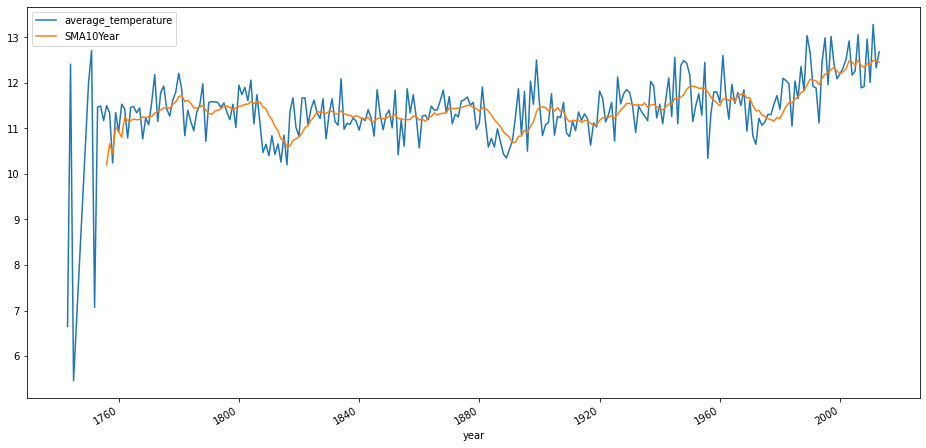

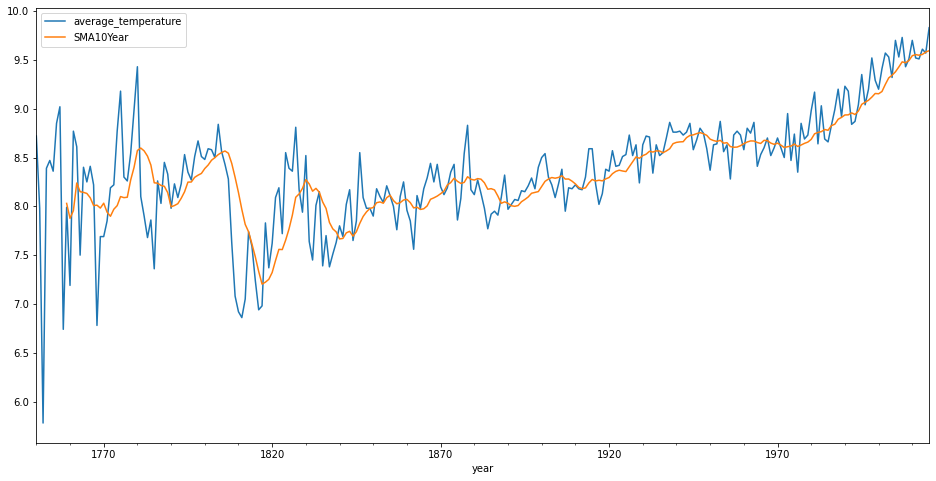

In [21]:
# Comparing Moving Average to Granular data
city_data[['average_temperature', 'SMA10Year']].plot(label = 'Temperature', figsize = (16,8))
global_data[['average_temperature', 'SMA10Year']].plot(label = 'Temperature', figsize = (16,8))


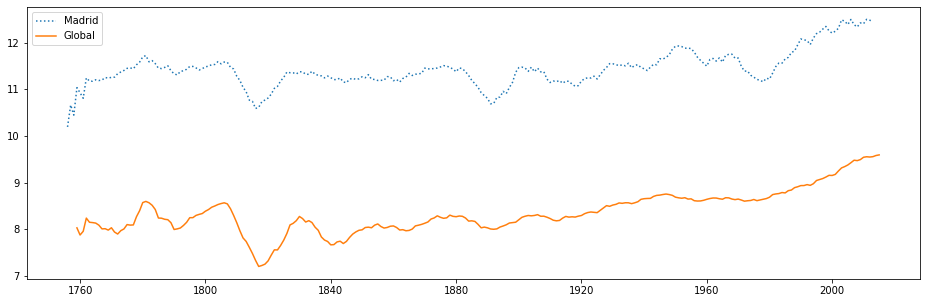

In [28]:
plt.plot(city_data['SMA10Year'], label = 'Madrid', linestyle = ':')
plt.plot(global_data['SMA10Year'], label = 'Global', linestyle = '-')
plt.legend()
plt.show()